TRANSFORMADA HIT-OR-MISS

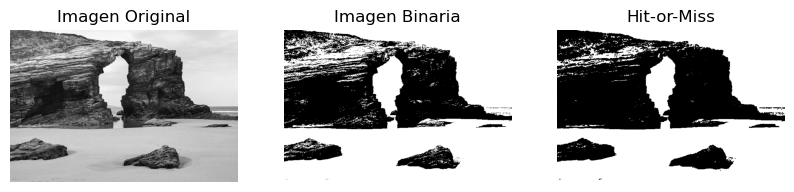

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('2.png', cv2.IMREAD_GRAYSCALE)

_, img_binaria = cv2.threshold(imagen, 127, 255, cv2.THRESH_BINARY)

# Elemento estructurante para Hit-or-Miss
kernel1 = np.array([[0,1,0],
                    [1,1,1],
                    [0,1,0]], dtype=np.uint8)

hitormiss = cv2.morphologyEx(img_binaria, cv2.MORPH_HITMISS, kernel1)

plt.figure(figsize=(10,5))
plt.subplot(1, 3, 1)
plt.title("Imagen Original")
plt.imshow(imagen, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Imagen Binaria")
plt.imshow(img_binaria, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Hit-or-Miss")
plt.imshow(hitormiss, cmap='gray')
plt.axis("off")

plt.show()


TRANFORMACIONES GEODESICAS

Erosión , Dilatación
 

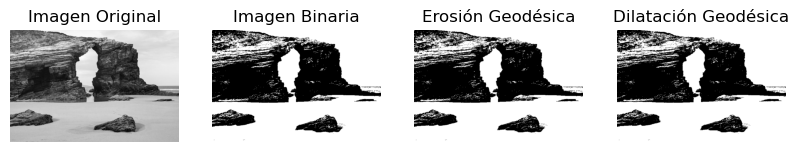

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import reconstruction

imagen = cv2.imread('2.png', cv2.IMREAD_GRAYSCALE)

_, imgBin = cv2.threshold(imagen, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imgBin_bool = imgBin.astype(bool)
img2 = np.copy(imgBin_bool)
mask = imgBin_bool

# Erosión geodésica
ero_geodesica = reconstruction(img2, mask, method='erosion')
# Dilatación geodésica
dila_geodesica = reconstruction(img2, mask, method='dilation')

plt.figure(figsize=(10,5))

plt.subplot(1, 4, 1)
plt.title("Imagen Original")
plt.imshow(imagen, cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("Imagen Binaria")
plt.imshow(imgBin, cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 3)
plt.title("Erosión Geodésica")
plt.imshow(ero_geodesica, cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 4)
plt.title("Dilatación Geodésica")
plt.imshow(dila_geodesica, cmap='gray')
plt.axis("off")

plt.show()



Iteracion Con For

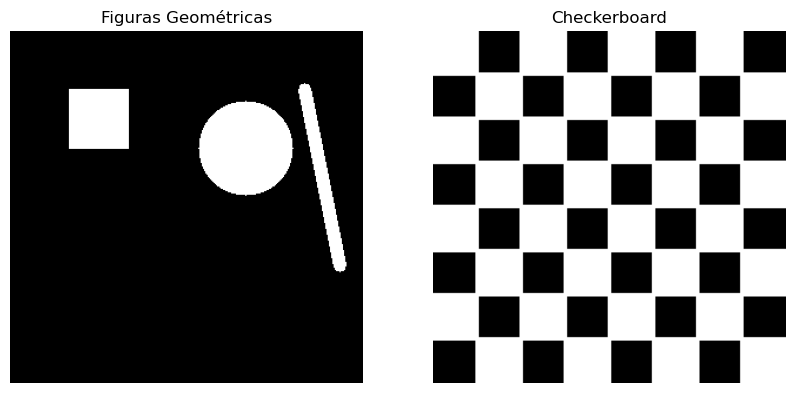

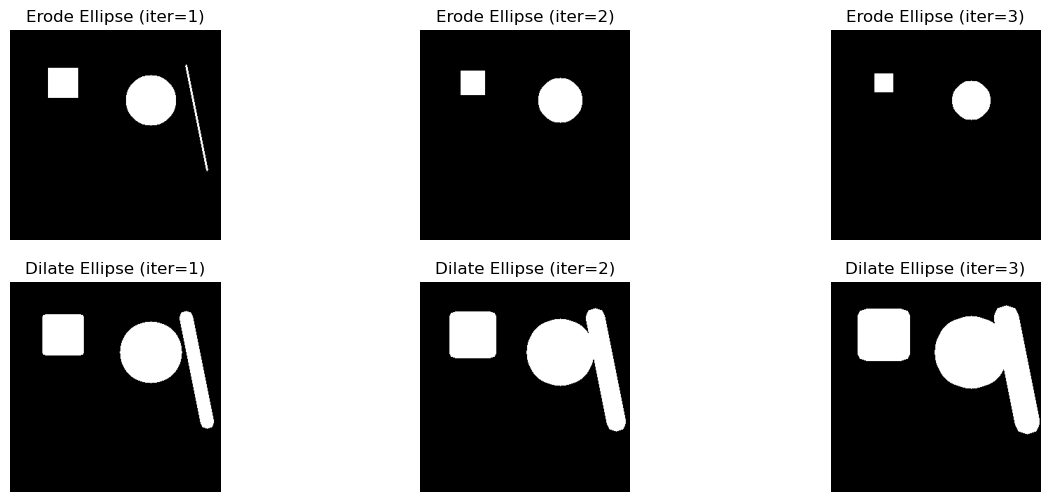

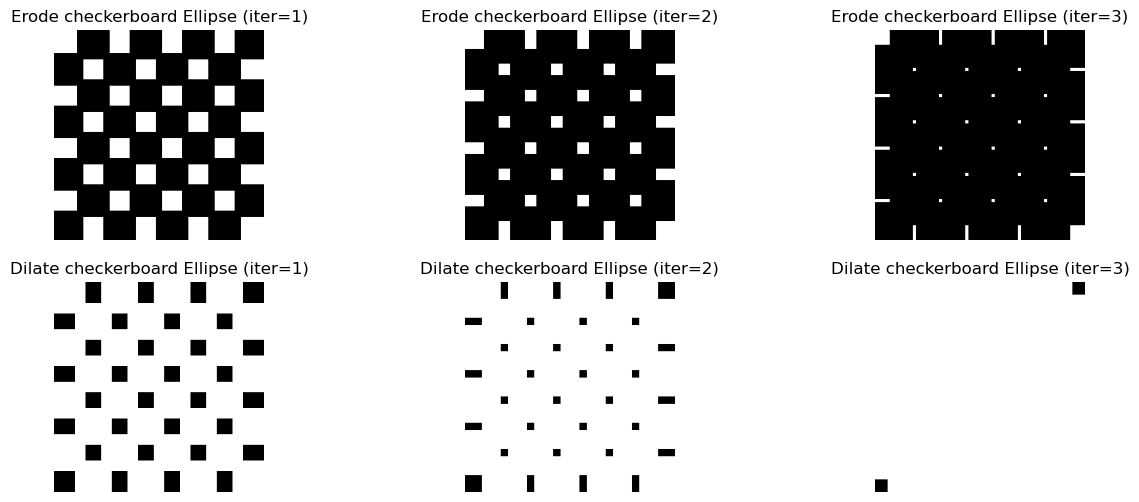

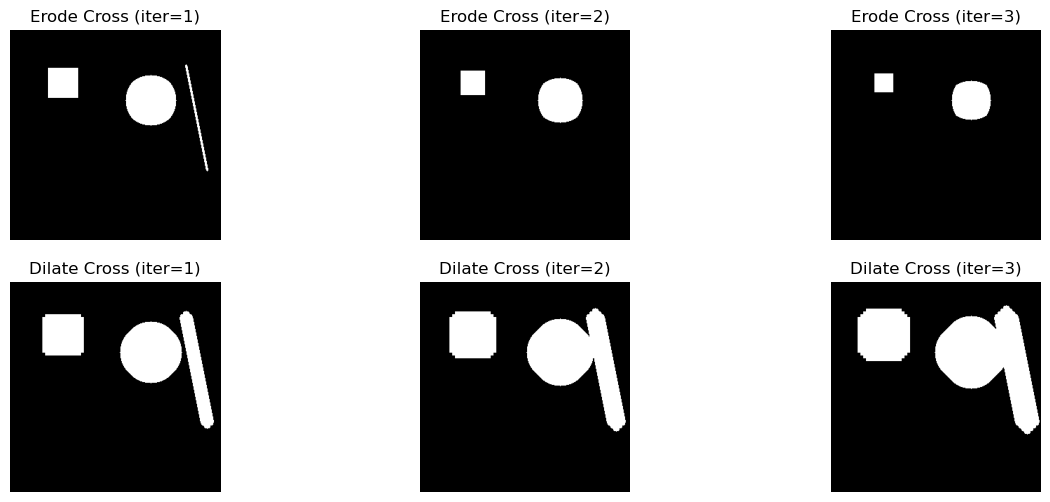

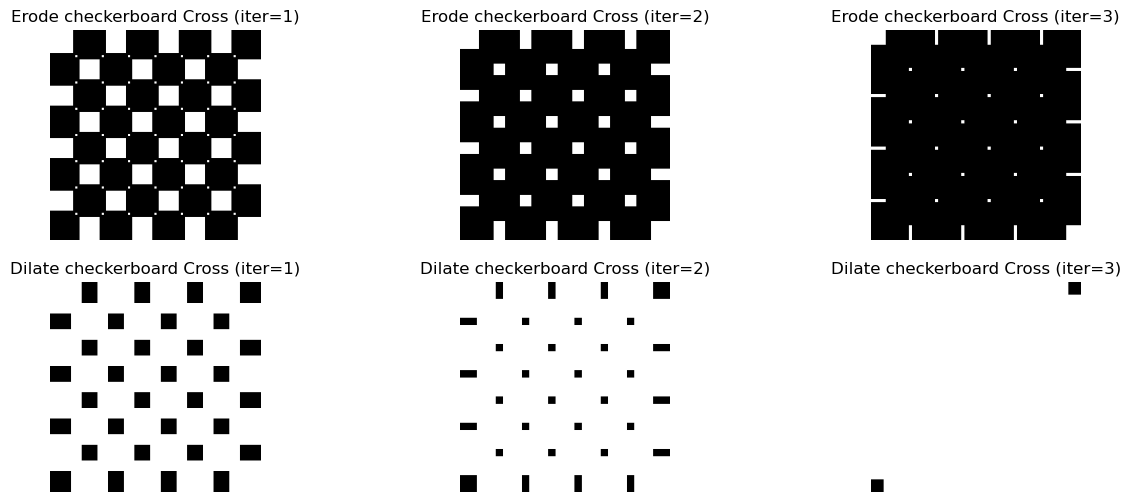

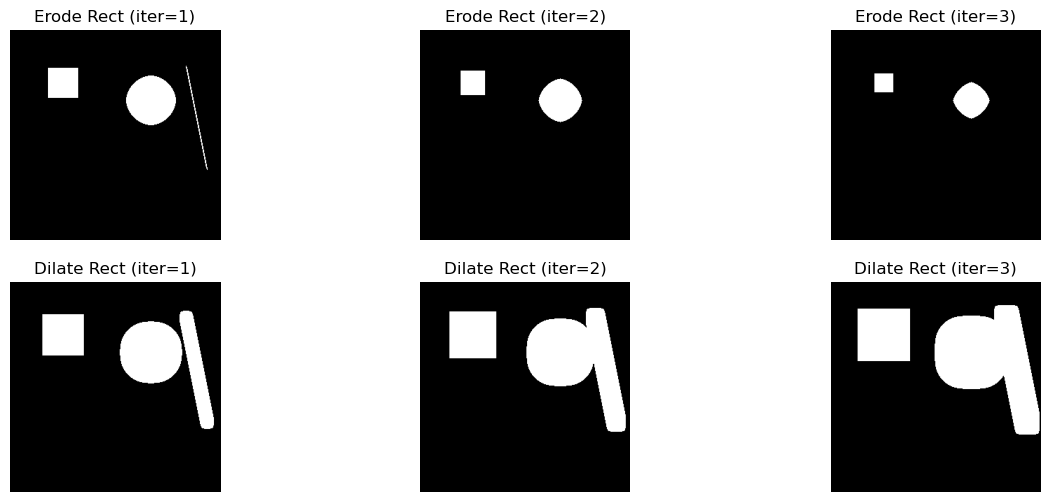

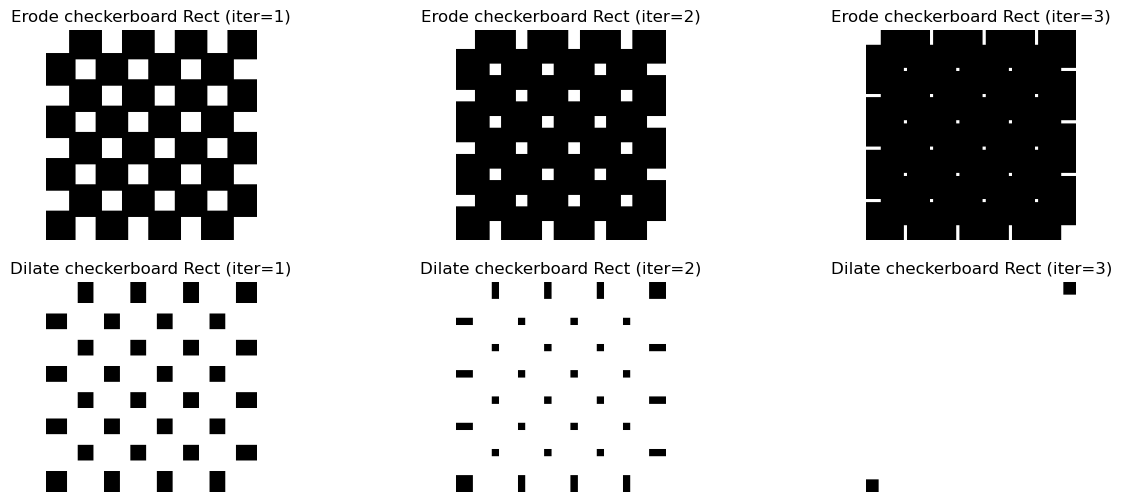

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import checkerboard

imagen = np.zeros((300, 300), dtype=np.uint8)
imagen = cv2.circle(imagen, (200, 100), 40, 255, -1)
imagen = cv2.rectangle(imagen, (50, 50), (100, 100), 255, -1)
imagen = cv2.line(imagen, (250, 50), (280, 200), 255, 10)

check = checkerboard() > 8.5
check = check.astype(np.uint8) * 255

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Figuras Geométricas')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(check, cmap='gray')
plt.title('Checkerboard')
plt.axis('off')
plt.show()

kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
# Erosión y dilatación con distintos iterationes
plt.figure(figsize=(15, 6))
for i, it in enumerate([1, 2, 3]):
    eroded = cv2.erode(imagen, kernel_ellipse, iterations=it)
    dilated = cv2.dilate(imagen, kernel_ellipse, iterations=it)
    

    plt.subplot(2, 3, i + 1)
    plt.imshow(eroded, cmap='gray')
    plt.title(f'Erode Ellipse (iter={it})')
    plt.axis('off')

    plt.subplot(2, 3, i + 4)
    plt.imshow(dilated, cmap='gray')
    plt.title(f'Dilate Ellipse (iter={it})')
    plt.axis('off')

plt.show()

kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
# Erosión y dilatación con distintos iterationes
plt.figure(figsize=(15, 6))
for i, it in enumerate([1, 2, 3]):
    eroded = cv2.erode(check, kernel_ellipse, iterations=it)
    dilated = cv2.dilate(check, kernel_ellipse, iterations=it)

    plt.subplot(2, 3, i + 1)
    plt.imshow(eroded, cmap='gray')
    plt.title(f'Erode checkerboard Ellipse (iter={it})')
    plt.axis('off')

    plt.subplot(2, 3, i + 4)
    plt.imshow(dilated, cmap='gray')
    plt.title(f'Dilate checkerboard Ellipse (iter={it})')
    plt.axis('off')

plt.show()

kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (9, 9))
# Erosión y dilatación con distintos iterationes
plt.figure(figsize=(15, 6))
for i, it in enumerate([1, 2, 3]):
    eroded = cv2.erode(imagen, kernel_cross, iterations=it)
    dilated = cv2.dilate(imagen, kernel_cross, iterations=it)

    plt.subplot(2, 3, i + 1)
    plt.imshow(eroded, cmap='gray')
    plt.title(f'Erode Cross (iter={it})')
    plt.axis('off')

    plt.subplot(2, 3, i + 4)
    plt.imshow(dilated, cmap='gray')
    plt.title(f'Dilate Cross (iter={it})')
    plt.axis('off')

plt.show()

kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (9, 9))
# Erosión y dilatación con distintos iterationes
plt.figure(figsize=(15, 6))
for i, it in enumerate([1, 2, 3]):
    eroded = cv2.erode(check, kernel_cross, iterations=it)
    dilated = cv2.dilate(check, kernel_cross, iterations=it)

    plt.subplot(2, 3, i + 1)
    plt.imshow(eroded, cmap='gray')
    plt.title(f'Erode checkerboard Cross (iter={it})')
    plt.axis('off')

    plt.subplot(2, 3, i + 4)
    plt.imshow(dilated, cmap='gray')
    plt.title(f'Dilate checkerboard Cross (iter={it})')
    plt.axis('off')

plt.show()

kernel_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))
# Erosión y dilatación con distintos iterationes
plt.figure(figsize=(15, 6))
for i, it in enumerate([1, 2, 3]):
    eroded = cv2.erode(imagen, kernel_rect, iterations=it)
    dilated = cv2.dilate(imagen, kernel_rect, iterations=it)

    plt.subplot(2, 3, i + 1)
    plt.imshow(eroded, cmap='gray')
    plt.title(f'Erode Rect (iter={it})')
    plt.axis('off')

    plt.subplot(2, 3, i + 4)
    plt.imshow(dilated, cmap='gray')
    plt.title(f'Dilate Rect (iter={it})')
    plt.axis('off')

plt.show()

kernel_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))
# Erosión y dilatación con distintos iterationes
plt.figure(figsize=(15, 6))
for i, it in enumerate([1, 2, 3]):
    eroded = cv2.erode(check, kernel_rect, iterations=it)
    dilated = cv2.dilate(check, kernel_rect, iterations=it)

    plt.subplot(2, 3, i + 1)
    plt.imshow(eroded, cmap='gray')
    plt.title(f'Erode checkerboard Rect (iter={it})')
    plt.axis('off')

    plt.subplot(2, 3, i + 4)
    plt.imshow(dilated, cmap='gray')
    plt.title(f'Dilate checkerboard Rect (iter={it})')
    plt.axis('off')

plt.show()



